In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image
from IPython.display import display, HTML
import base64

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [4]:
# Base project path
BASE_DIR = "/projects/qb36/lontar_project"
DATA_DIR = os.path.join(BASE_DIR, "data")

train_file = os.path.join(DATA_DIR, 'balinese_transliteration_train.txt')
test_file = os.path.join(DATA_DIR, 'balinese_transliteration_test.txt')
image_dir = os.path.join(DATA_DIR, 'balinese_word_train')

# Load the dataset
def load_data(file_path):
    filenames = []
    labels = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(';') if ';' in line else line.strip().split('\t')
            if len(parts) == 2:
                filenames.append(parts[0].strip())
                labels.append(parts[1].strip())
            else:
                print(f"Skipping malformed line: {line}")

    return pd.DataFrame({'filename': filenames, 'label': labels})

# Load both training and testing datasets
train_df = load_data(train_file)
test_df = load_data(test_file)

# Display dataset information
print("Training Data Sample:")
display(train_df.head())

print("\nTesting Data Sample:")
display(test_df.head())

print("\nTraining Set Shape:", train_df.shape)
print("Testing Set Shape:", test_df.shape)

Training Data Sample:


,filename,label
0,train1.png,kagastu
1,train2.png,","
2,train3.png,gelak
3,train4.png,ancak
4,train5.png,","



Testing Data Sample:


,filename,label
0,test1.png,","
1,test2.png,biakta
2,test3.png,ngantah
3,test4.png,sarira
4,test5.png,yu



Training Set Shape: (15022, 2)
Testing Set Shape: (10475, 2)


In [6]:
# Unique transliterations
unique_translations = train_df['label'].nunique()
print(f"Total Unique Transliteration Words: {unique_translations}")

# Frequency counts
label_counts = train_df['label'].value_counts()

# Words appearing only once and less than 3 times
words_once = (label_counts == 1).sum()
words_less_than_3 = (label_counts < 3).sum()
percentage_once = (words_once / unique_translations) * 100
percentage_less_3 = (words_less_than_3 / unique_translations) * 100

print(f"Words appearing only once: {words_once} ({percentage_once:.2f}%)")
print(f"Words appearing less than 3 times: {words_less_than_3} ({percentage_less_3:.2f}%)")

# Most frequent words
print("\nTop 5 Most Frequent Words:")
display(label_counts.head(5))

# Least frequent words
print("\nBottom 5 Least Frequent Words:")
display(label_counts.tail(5))


Total Unique Transliteration Words: 4745
Words appearing only once: 3339 (70.37%)
Words appearing less than 3 times: 3961 (83.48%)

Top 5 Most Frequent Words:


label
,       3065
.        461
ring     223
nga      212
sang     151
Name: count, dtype: int64


Bottom 5 Least Frequent Words:


label
truju       1
bwa         1
kramania    1
kalinan     1
ngopita     1
Name: count, dtype: int64

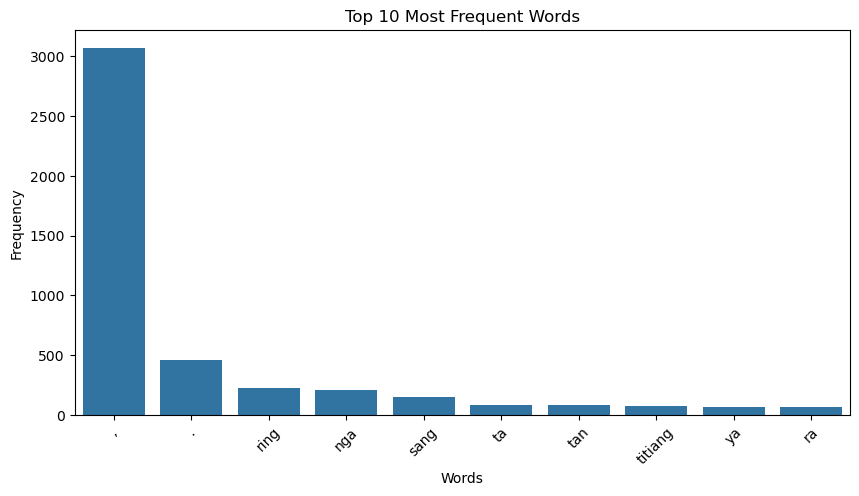

In [27]:
# Bar chart of the top 10 most frequent words
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.head(10).index, y=label_counts.head(10).values)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()



Unique Characters in Training Set: ,-.0123456789ABCDEGIJKLMNOPRSTUWabcdeghijklmnoprstuwyË
Unique Characters in Testing Set: ,-.0123456789ABCDEGHIJKLMNOPRSTUWabcdeghijklmnoprstuwy


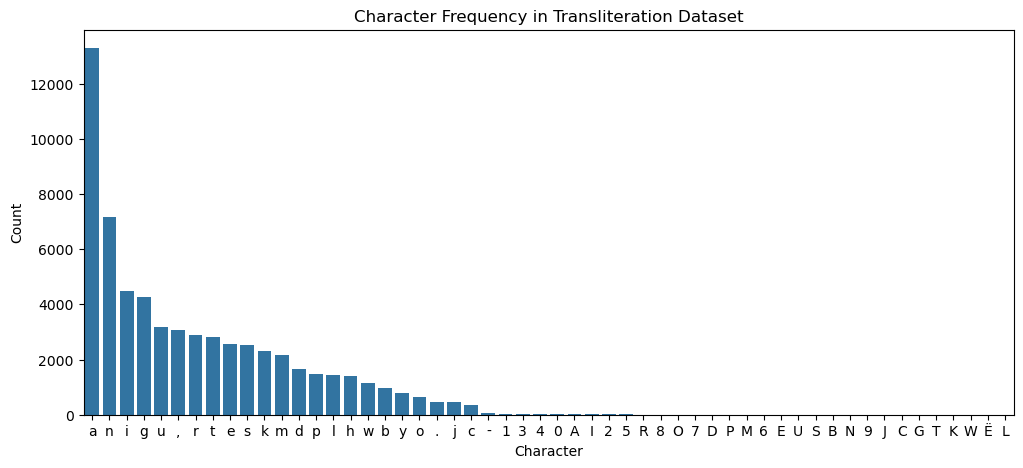

In [28]:
# Extract all unique characters in training and testing sets
train_chars = set("".join(train_df['label']))
test_chars = set("".join(test_df['label']))

# Count character occurrences
char_counts = Counter("".join(train_df['label']))
char_df = pd.DataFrame(char_counts.items(), columns=['Character', 'Count']).sort_values(by="Count", ascending=False)

print("\nUnique Characters in Training Set:", "".join(sorted(train_chars)))
print("Unique Characters in Testing Set:", "".join(sorted(test_chars)))

# Bar plot of character frequencies
plt.figure(figsize=(12, 5))
sns.barplot(x=char_df["Character"], y=char_df["Count"])
plt.title("Character Frequency in Transliteration Dataset")
plt.xlabel("Character")
plt.ylabel("Count")
plt.show()



 Rare Words (Appear <3 Times)


Image,Transliteration
,nurun
,nurun
,ye
,ye
,malajahin
,malajahin
,tuna
,tuna
,mangu
,mangu

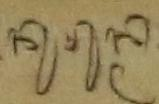
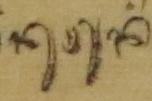
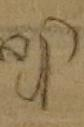
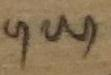
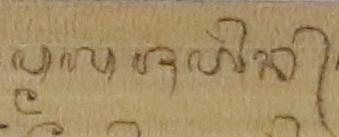
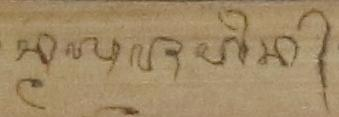
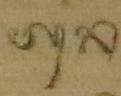
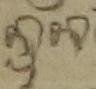
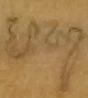
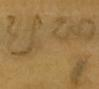
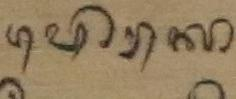
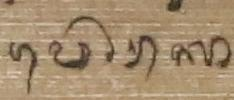
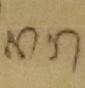
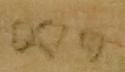
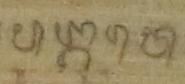
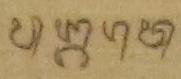
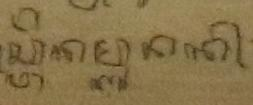
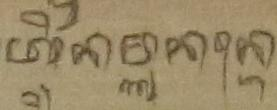
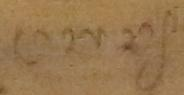
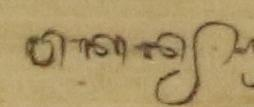

In [9]:
from IPython.display import display, HTML
from PIL import Image
import base64

def encode_image(image_path):
    """
    Converts an image to a base64 encoded string for embedding in an HTML table.
    """
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")

def display_images_in_table(word_list, title, num_examples=3):
    """
    Displays images and their corresponding transliterations in a formatted HTML table.
    """
    print(f"\n {title}")

    html_table = f"""
    <h3>{title}</h3>
    <table border="1" style="border-collapse: collapse; width: 50%;">
        <tr>
            <th style="padding: 8px; text-align: center;">Image</th>
            <th style="padding: 8px; text-align: center;">Transliteration</th>
        </tr>
    """

    for word in word_list:
        subset = train_df[train_df['label'] == word].head(num_examples)
        for _, row in subset.iterrows():
            img_path = os.path.join(image_dir, row['filename'])
            if os.path.exists(img_path):
                img_base64 = encode_image(img_path)
                img_tag = f'<img src="data:image/png;base64,{img_base64}" width="100">'
                html_table += f"""
                <tr>
                    <td style="padding: 8px; text-align: center;">{img_tag}</td>
                    <td style="padding: 8px; text-align: center;">{row['label']}</td>
                </tr>
                """
            else:
                print(f"Missing Image: {img_path}")

    html_table += "</table>"
    display(HTML(html_table))

# Show images for the most frequent words in a table
# top_5_words = label_counts.index[:5]
# display_images_in_table(top_5_words, "Top 5 Frequent Words")

# Show images for least frequent words (if available)
rare_words = label_counts[label_counts < 3].index[:10]
display_images_in_table(rare_words, "Rare Words (Appear <3 Times)")


In [34]:
# Check for missing values
missing_values = train_df.isnull().sum().sum()
duplicates = train_df.duplicated().sum()

if missing_values == 0:
    print("No missing values detected.")
else:
    print(f"Missing values found: {missing_values}")

if duplicates == 0:
    print("No duplicate rows detected.")
else:
    print(f"Duplicate rows found: {duplicates}")


No missing values detected.
No duplicate rows detected.


In [33]:
# Find characters present in testing but NOT in training
test_extra_chars = test_chars - train_chars
if test_extra_chars:
    print("\n Characters in Testing but NOT in Training:")
    print(" ".join(sorted(test_extra_chars)))
else:
    print("\n No new characters in testing set.")



 Characters in Testing but NOT in Training:
H
